In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter

In [2]:
df = pd.read_excel('customer_retention_dataset.xlsx')

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [5]:
df.shape

(269, 71)

In [6]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [7]:
# Setting option to show max rows and max columns

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

In [8]:
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

**All the columns are categorical in nature**

In [9]:
from string  import digits

# Remmoviing tab spaces
df.columns = df.columns.str.replace('\t','')

# Removing digits
remove_digits = str.maketrans('','',digits)
df.columns = df.columns.str.translate(remove_digits)

# Removing trailing and leading spaces

df.columns = df.columns.str.strip()

In [10]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (P

In [11]:
df.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

# EDA: Univariate Analysis

In [12]:
customer_info = ['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?']

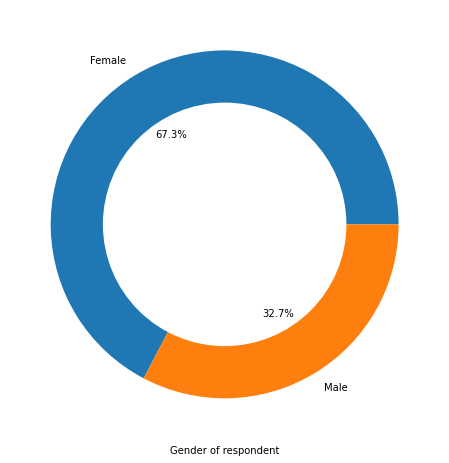

<Figure size 432x288 with 0 Axes>

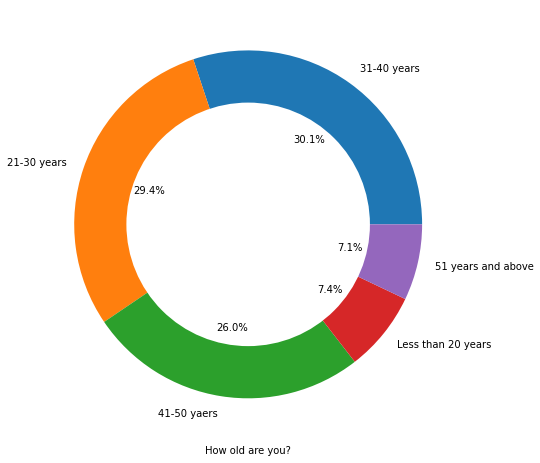

<Figure size 432x288 with 0 Axes>

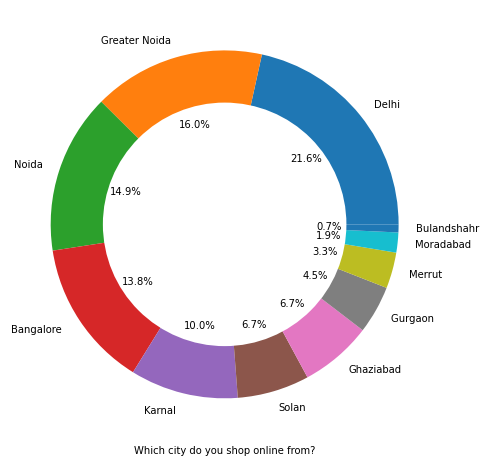

<Figure size 432x288 with 0 Axes>

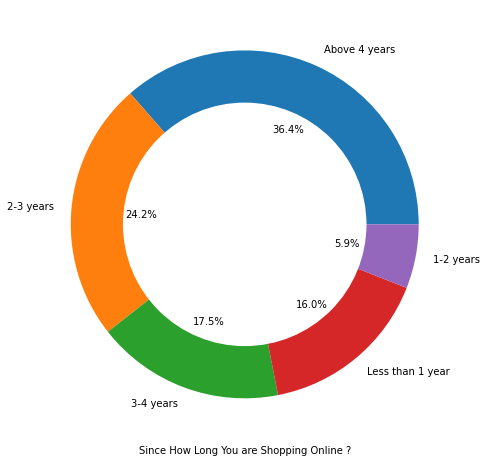

<Figure size 432x288 with 0 Axes>

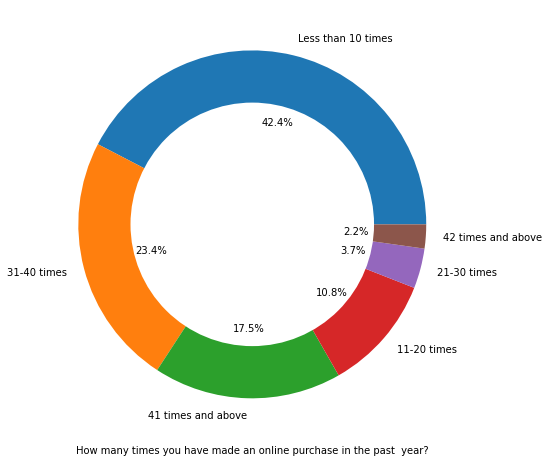

<Figure size 432x288 with 0 Axes>

In [13]:
for i in customer_info:
    if i!= 'What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(10,8))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()        

* There is double the number of women than men who have taken this survey. 

* Most of the people are in their 30's followed by 20's, teenagers and senior citizen are the least in number.

* Most of the people belong from delhi, noida and banglore, ambiguity can also be seen as noida has two categories (noida and grater noida) which need to be handled 

* Most of the people shopping online have been shopping from a long time.

* Majority of people shop online 10 times a year, ambiguity can also be seen for range 42 times and above which needs to be handled

In [14]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

In [15]:
#Changing Greater noida to Noida
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

# EDA: Bivariate Analysis

* Intention of Repeat purchase:

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

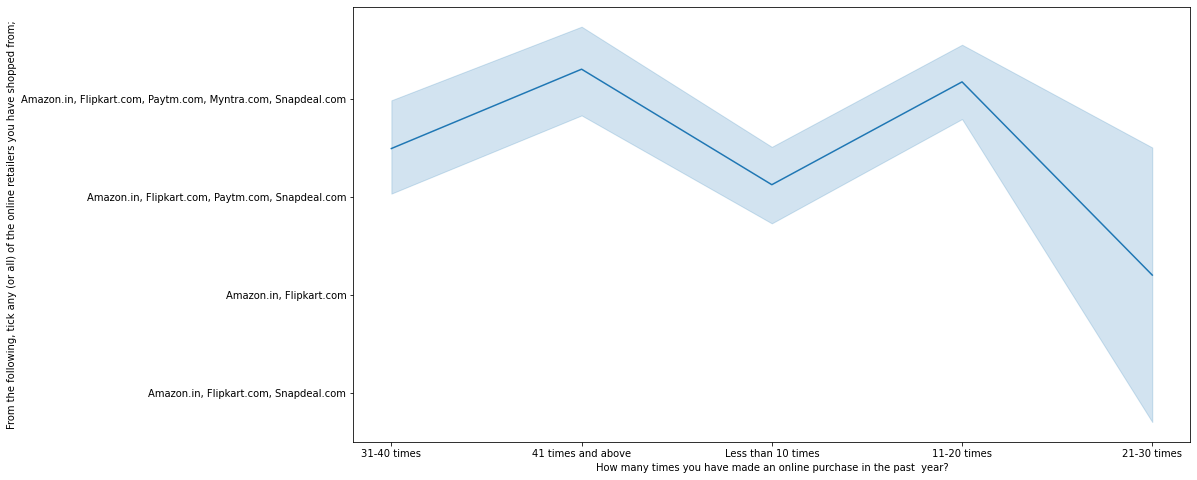

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

* Heavy shoppers who shop more than 41 times a year shop from all the online brands

* Some of the people who shop for 31-40 and less than 10 times a year seem to exclude myntra 

* People shop from Amazon and flipkart whatever be the case

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

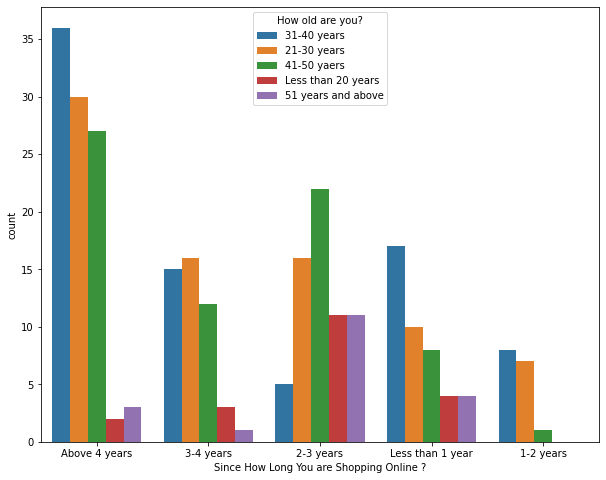

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

* Highest number of people have been shopping online for above 4 years except for the age group below 20 years and above 50 years

* People who are shopping online for 1-2 years does not include teenagers and elder people

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

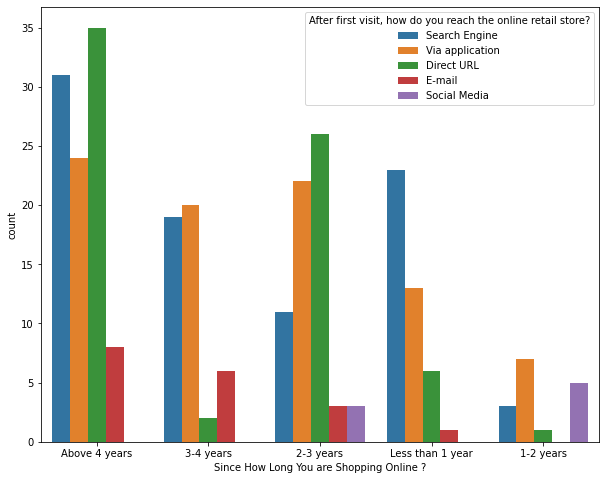

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

**Even though people who are shopping online for more than 3 years donot use the application rather use search engine and direct url's in large number which indicates that online brands should update all their platforms rather than just application.**

In [19]:
df['How do you access the internet while shopping on-line?'].unique()

array(['Dial-up', 'Wi-Fi', 'Mobile Internet', 'Mobile internet'],
      dtype=object)

In [20]:
#Changing Mobile internet to Mobile Internet
df['How do you access the internet while shopping on-line?'].replace({'Mobile internet':'Mobile Internet'},inplace=True)

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

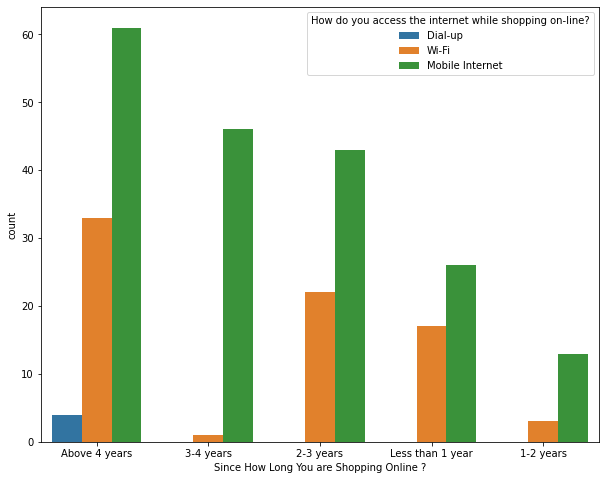

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['How do you access the internet while shopping on-line?'])

Majority of online shoppers use **Mobile Internet** to access the internet while shopping online

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

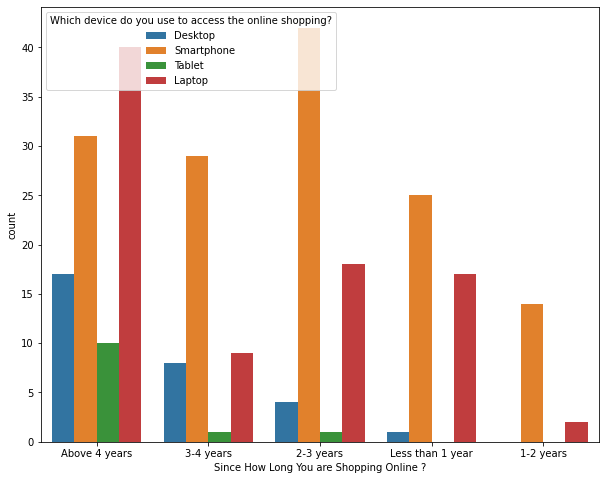

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['Which device do you use to access the online shopping?'])

**Smartphone** is the major device use to access the online shopping

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

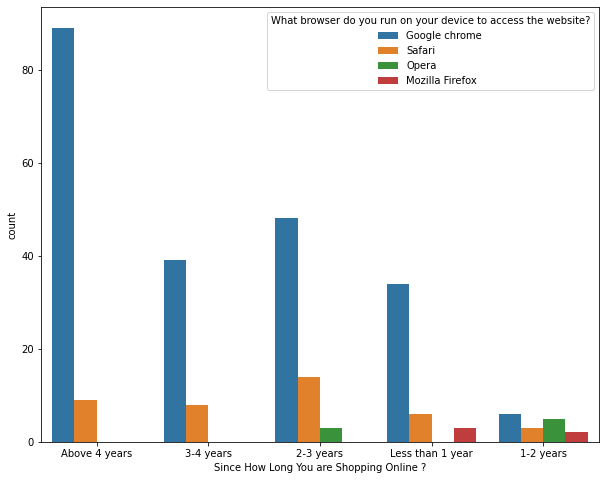

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['What browser do you run on your device to access the website?'])

Majority of online shoppers use **Google Chrome** browser on their device to access the website

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

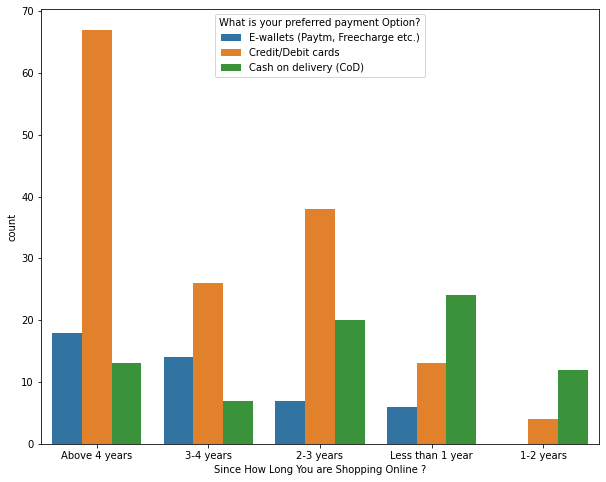

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['What is your preferred payment Option?'])

Majority of online shoppers use **Credit/Debit cards** as their preferred payment option

In [25]:
# Converting years to numbers for better analysis

dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

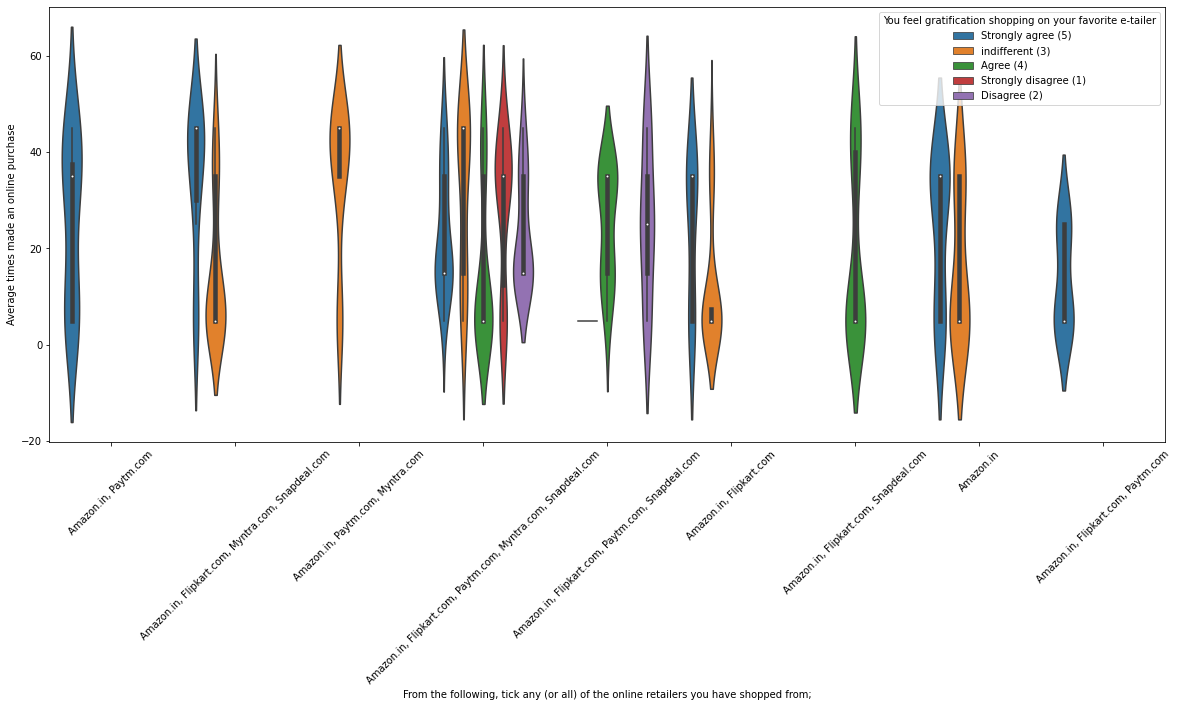

In [26]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

**Almost all the people who have shopped from amazon, flipkart and paytm are satisfied. People who shop from a more number of online brands dosent seem to be satisfied.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

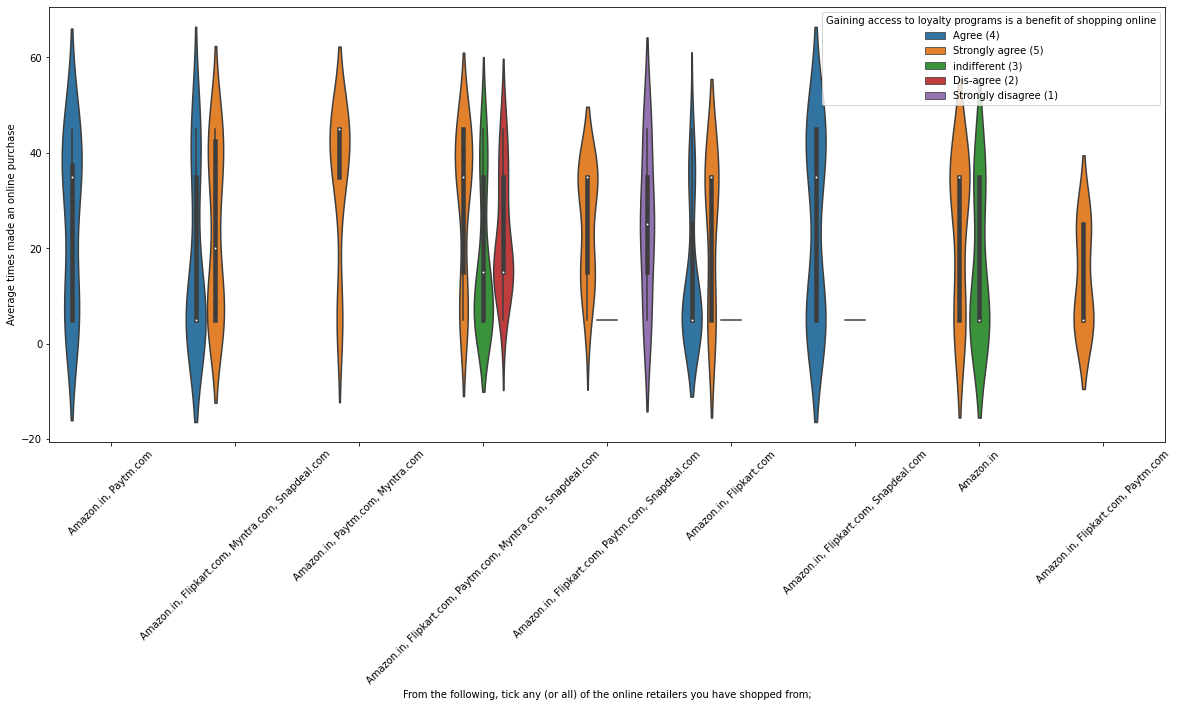

In [27]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

**People shopping from amazon and paytm are getting benefits from the loyalty points, flipkart and sanpdeal also seem to give such benefits but people who shop from almost everywhere disagree with this statement too**

In [28]:
# Converting years to numbers for better analysis

df['Since How Long You are Shopping Online ?'].unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

In [29]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Average years of shopping online'>

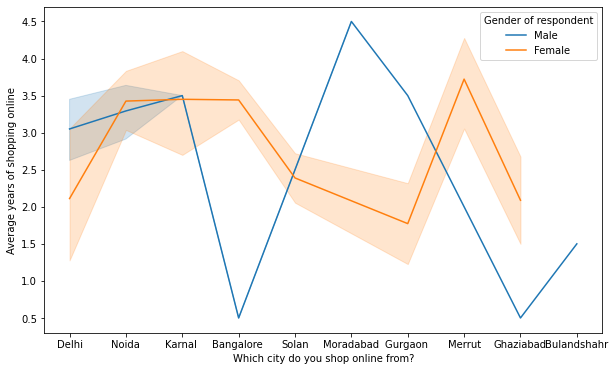

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(df['Which city do you shop online from?'],df['Average years of shopping online'],hue=df['Gender of respondent'])

* In lines, we can see that **density of female customers is more than male**

* Men living in Bangalore and Ghaziabad shop have shopped online for less than 1 year

* Highest number of men shopping online belong from Delhi and Noida, while men from Moradabad have been shopping online for the longest

* Women from Meerut and Noida have shopped the longest

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

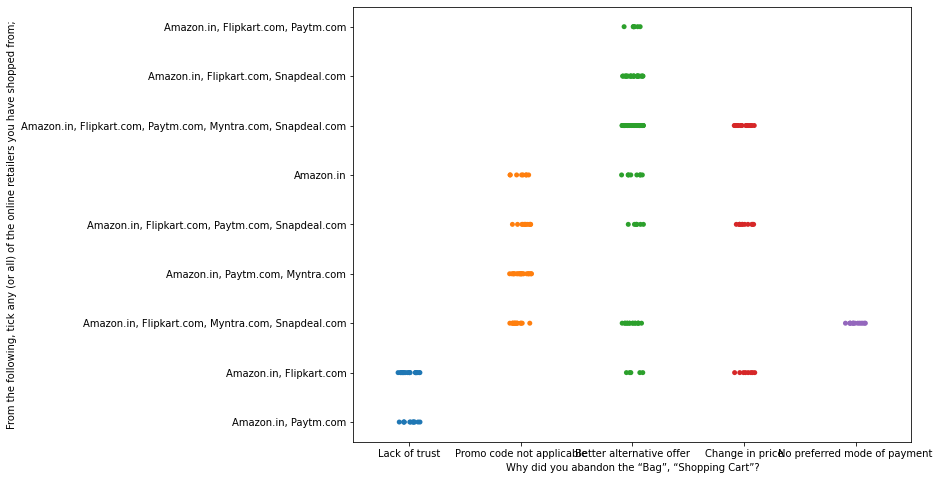

In [35]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

* We can clearly see that most of the time people abandon the bag because they get a better alternative offer or promo code   not applicable
* There is also lack of trust seen in amazon, flipkart and paytm by some people

# Brand Image

Brand image is the **customer's perception of your brand based on their interactions.**

In [31]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

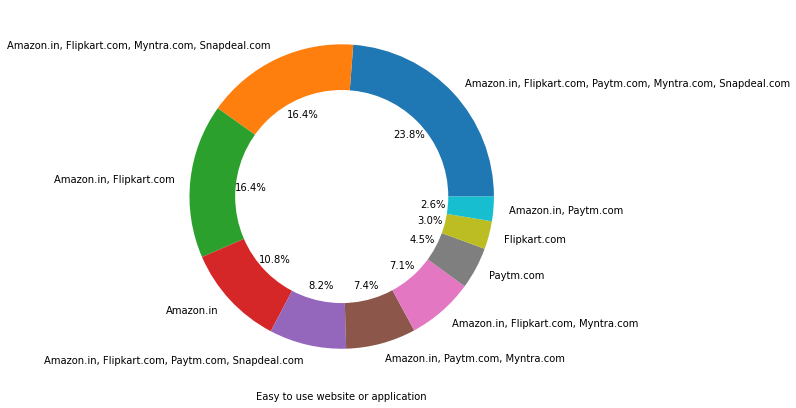

<Figure size 432x288 with 0 Axes>

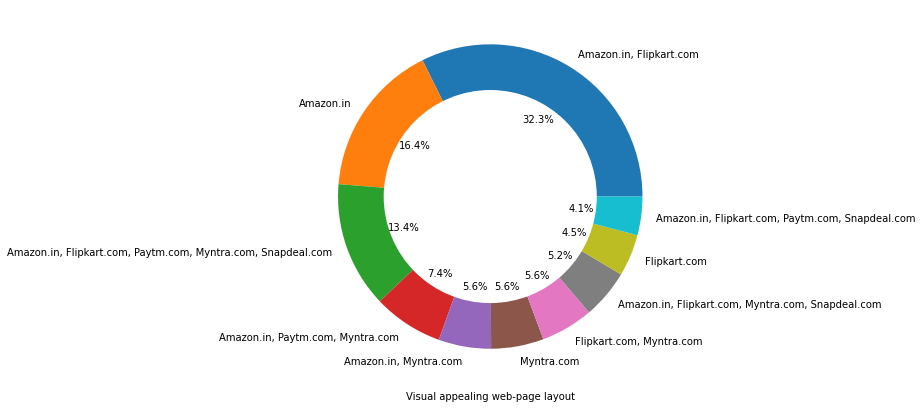

<Figure size 432x288 with 0 Axes>

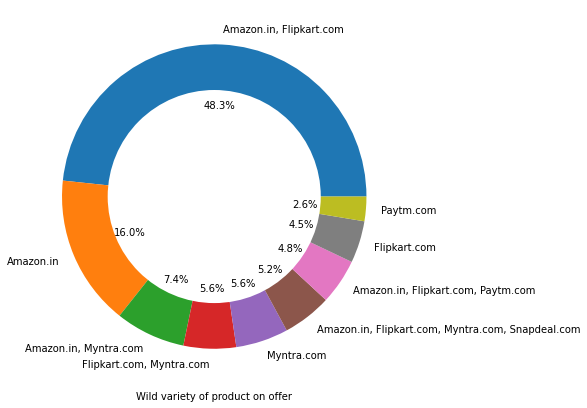

<Figure size 432x288 with 0 Axes>

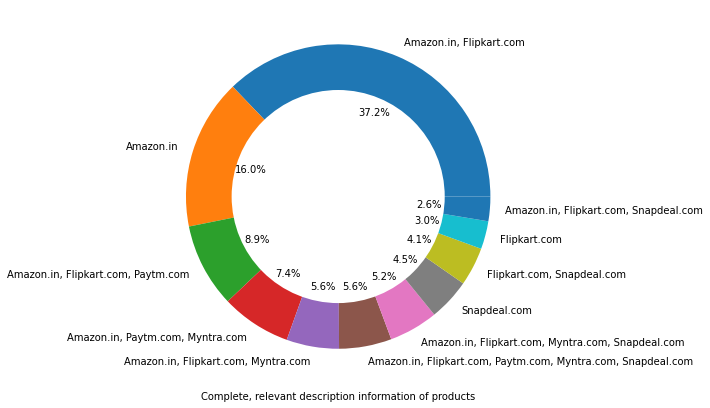

<Figure size 432x288 with 0 Axes>

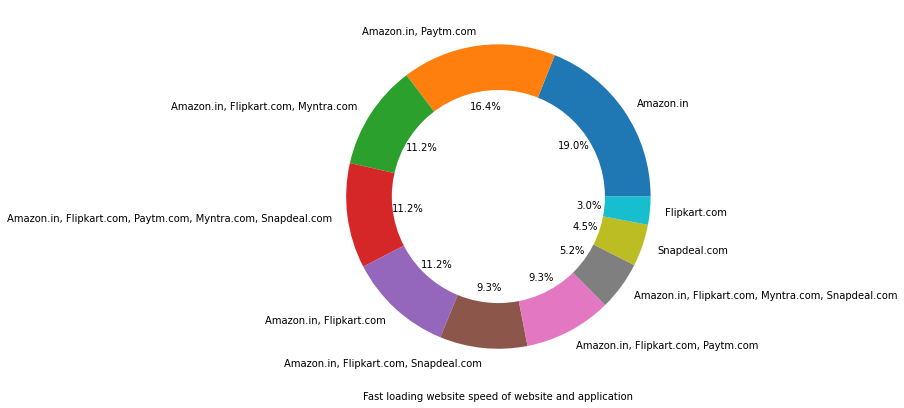

<Figure size 432x288 with 0 Axes>

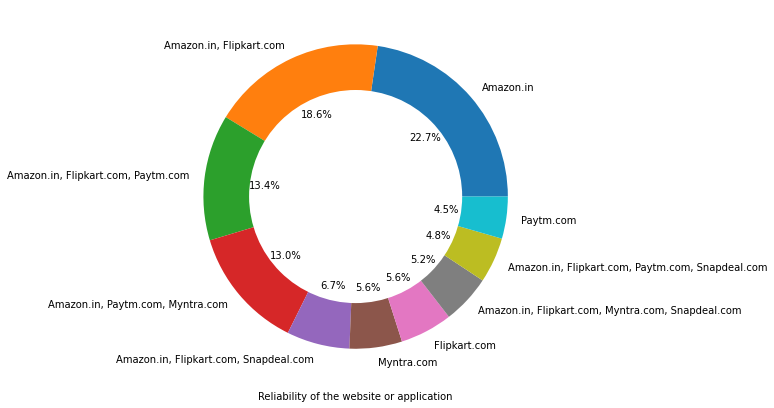

<Figure size 432x288 with 0 Axes>

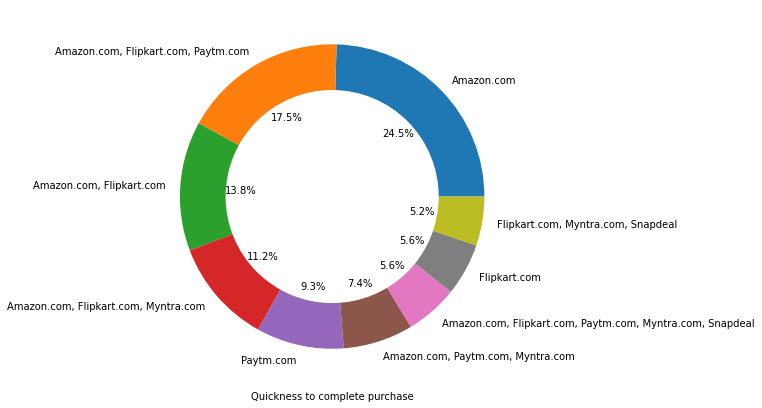

<Figure size 432x288 with 0 Axes>

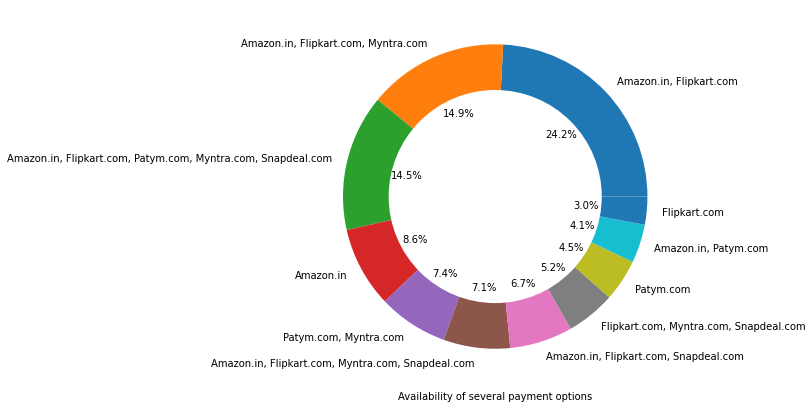

<Figure size 432x288 with 0 Axes>

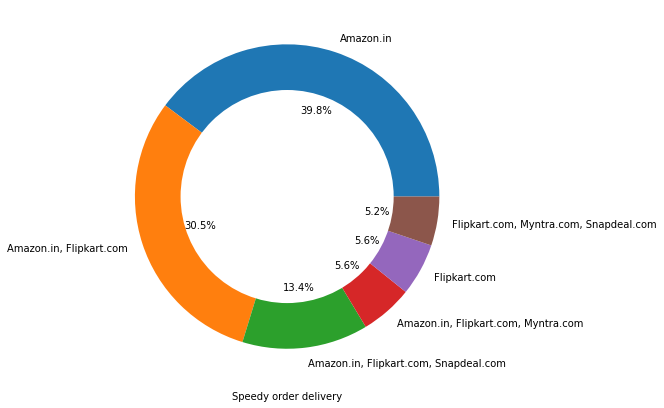

<Figure size 432x288 with 0 Axes>

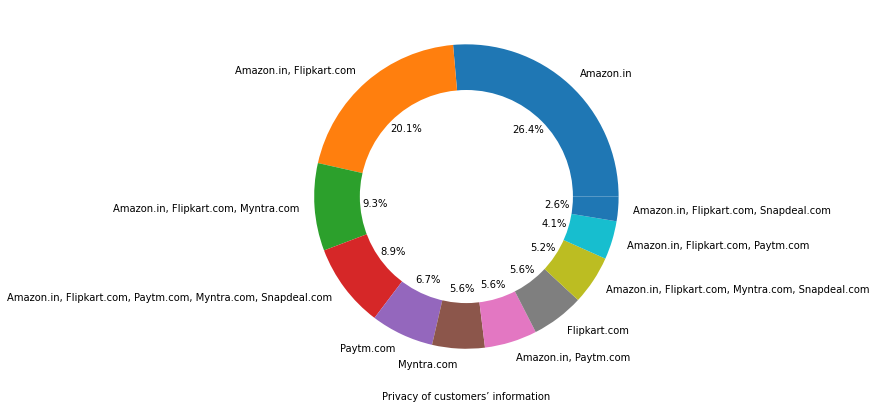

<Figure size 432x288 with 0 Axes>

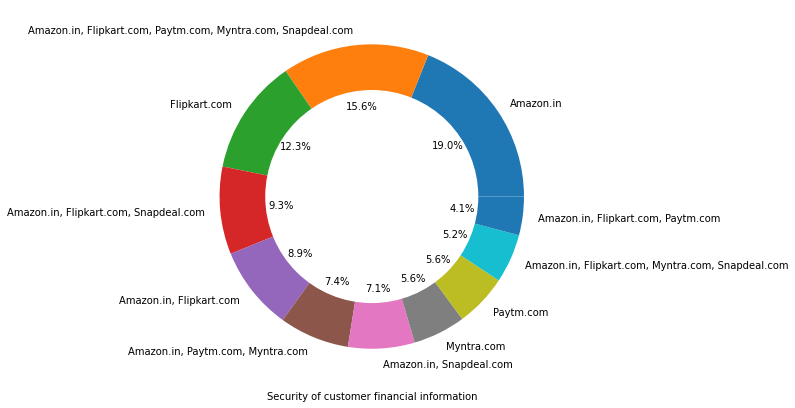

<Figure size 432x288 with 0 Axes>

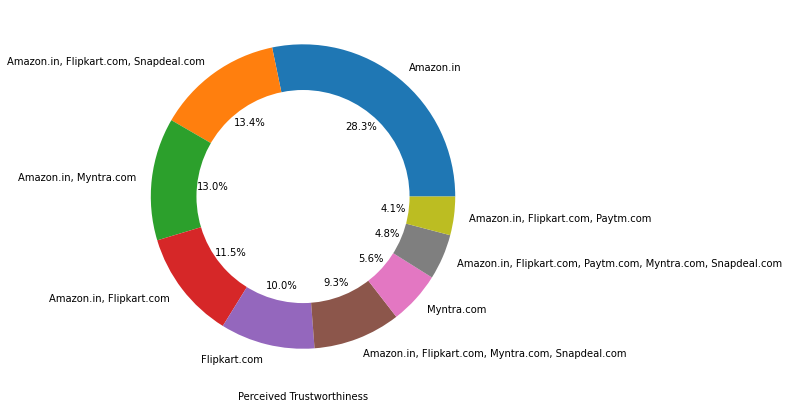

<Figure size 432x288 with 0 Axes>

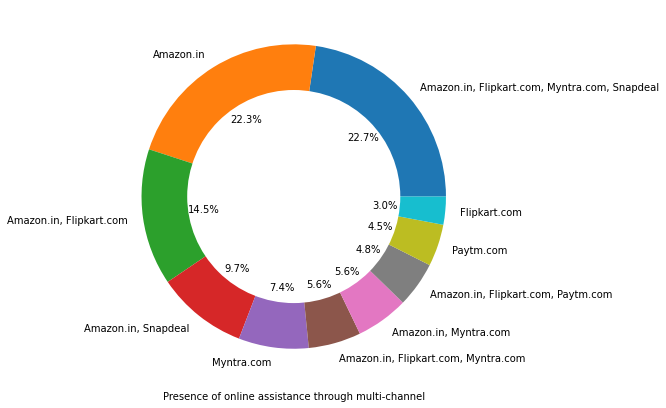

<Figure size 432x288 with 0 Axes>

In [34]:
for i in performance:
        plt.figure(figsize=(10,7))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

**Amazon, Flipkart have been had the highest votes for having all the positive points and have maintained a very good brand image followed by paytm and the myntra.**

# Loyalty

Loyal customers are those who keep using the same brand even if it is not good as other brands

In [36]:
#Collecting all the negative remarks about a brand

bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

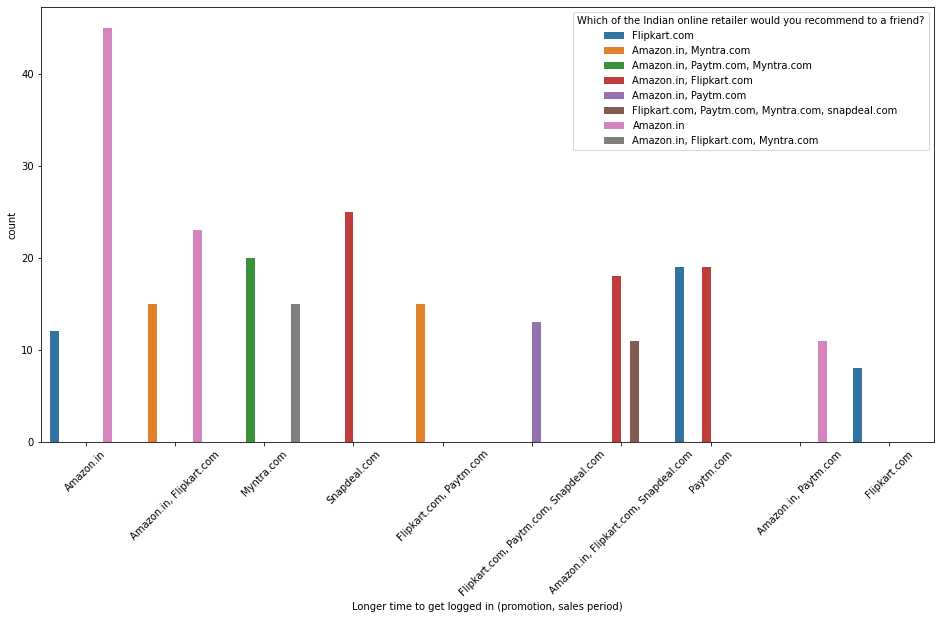

<Figure size 432x288 with 0 Axes>

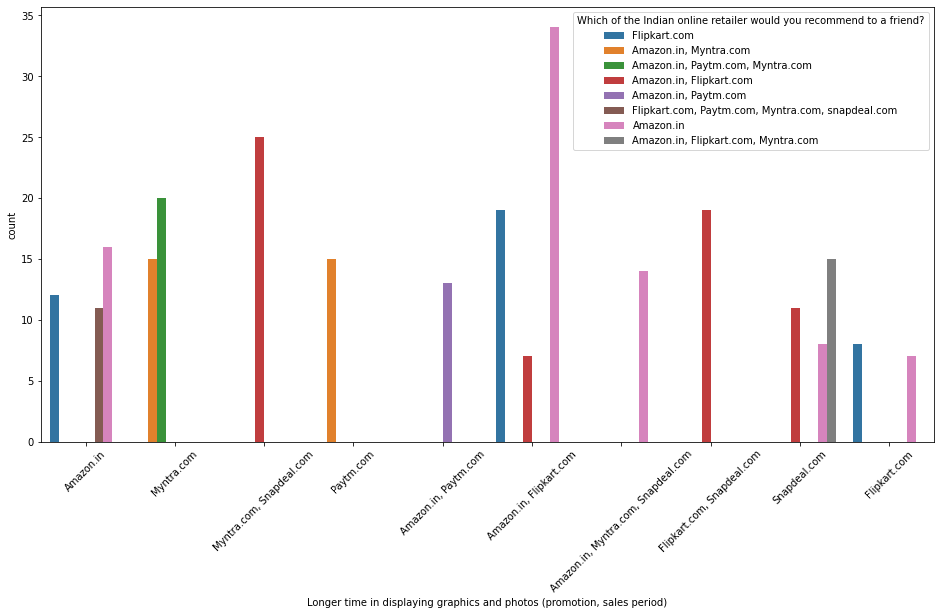

<Figure size 432x288 with 0 Axes>

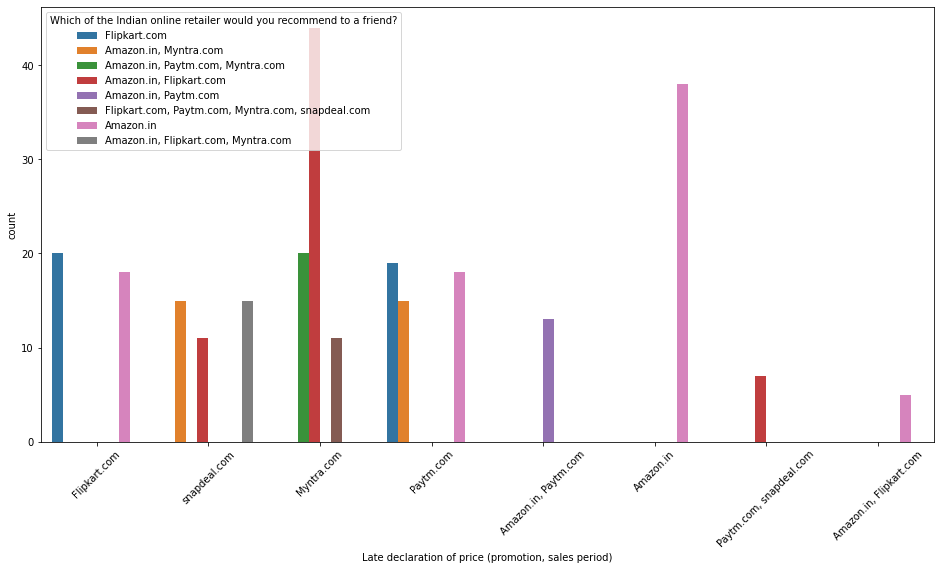

<Figure size 432x288 with 0 Axes>

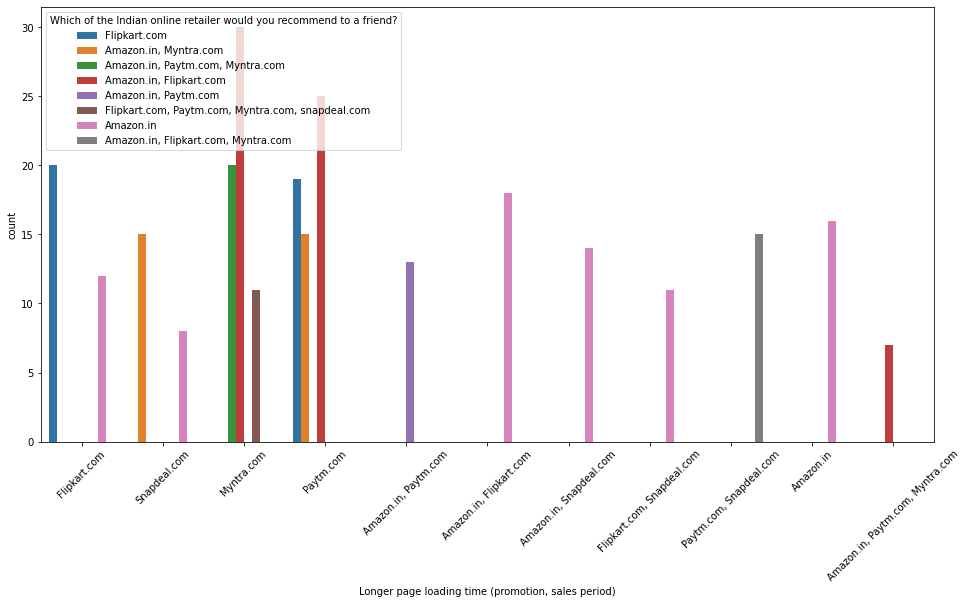

<Figure size 432x288 with 0 Axes>

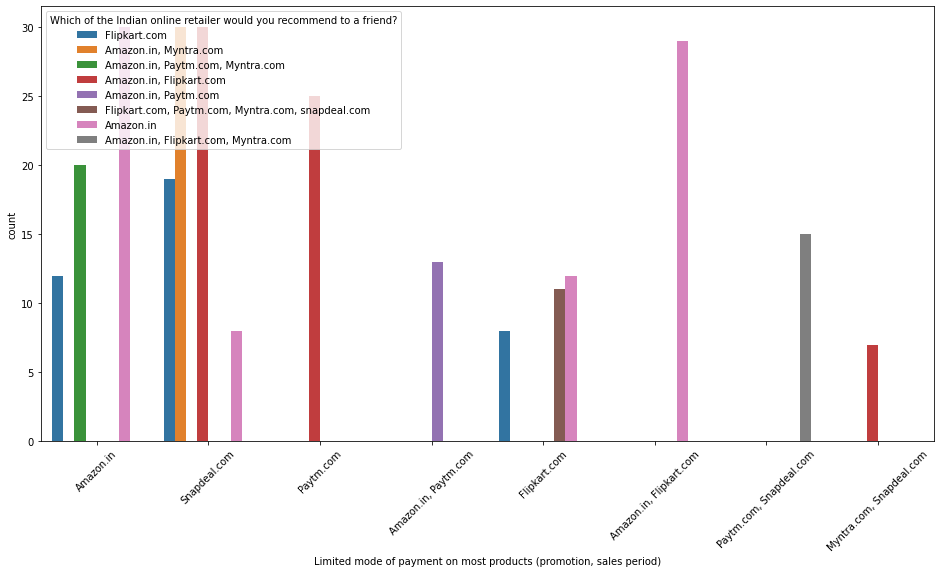

<Figure size 432x288 with 0 Axes>

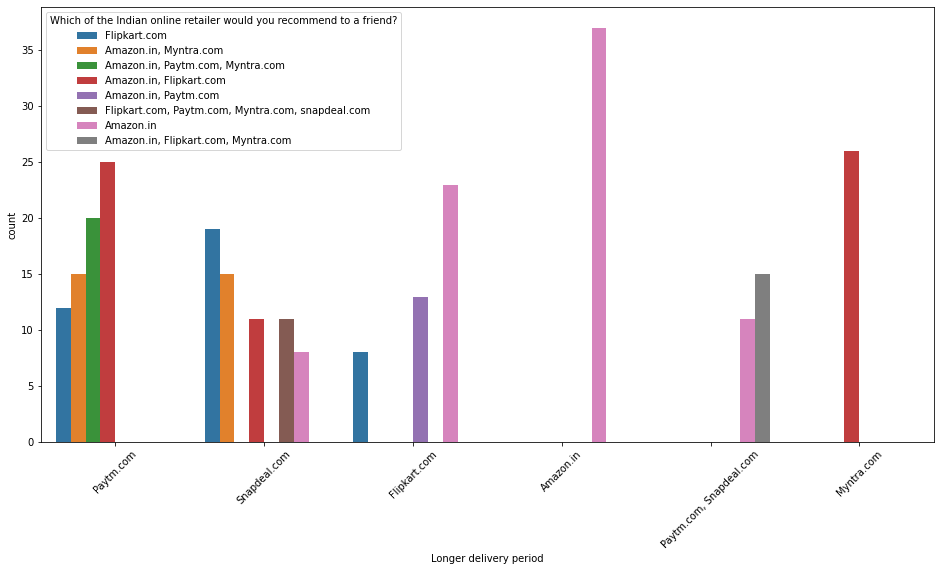

<Figure size 432x288 with 0 Axes>

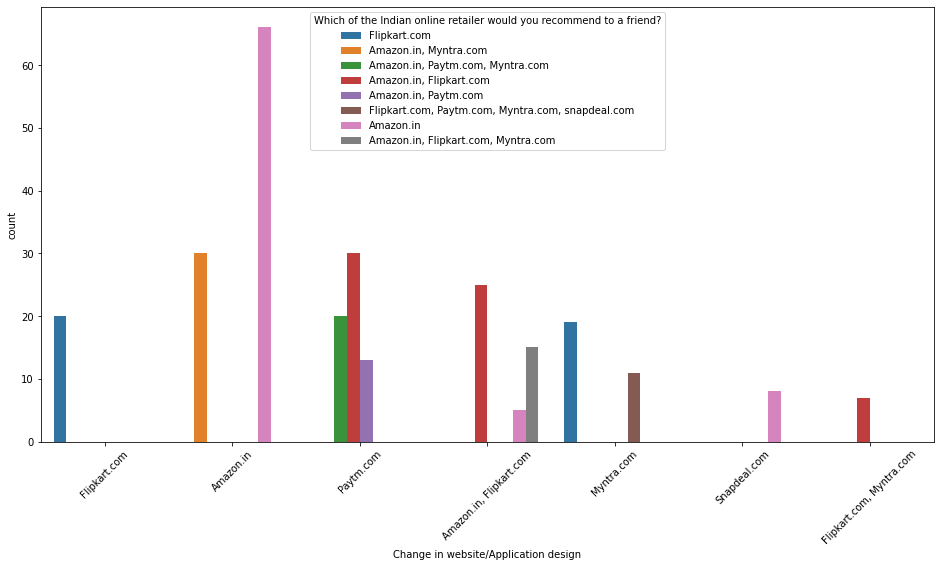

<Figure size 432x288 with 0 Axes>

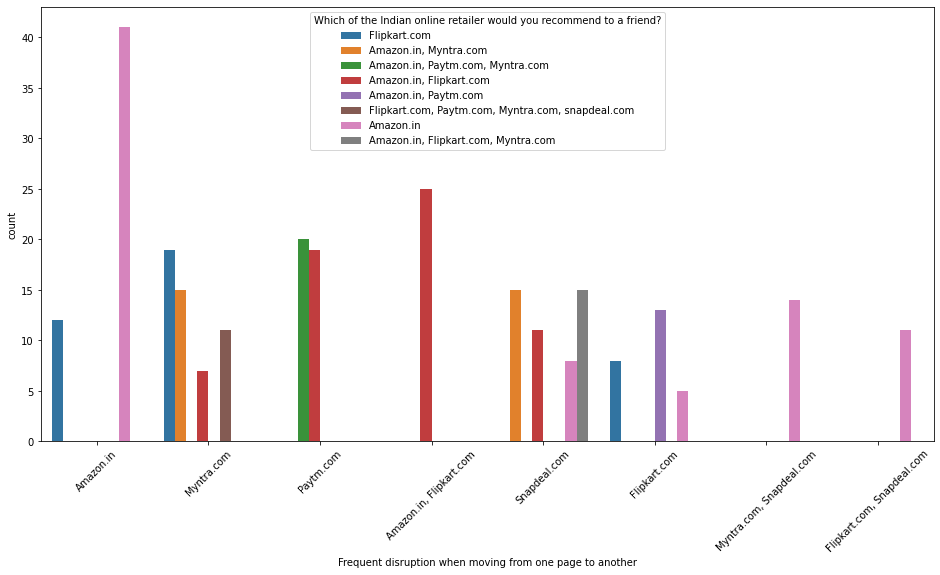

<Figure size 432x288 with 0 Axes>

In [37]:
for i in bad:
        plt.figure(figsize=(16,8))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

**Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks about them still they would recommend these platforms to their friend**